# Seattle collision data

BIG DATA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

pd.set_option('max_columns', 150)
pd.set_option('colwidth', 250)
pd.set_option('max_rows', 150)

In [2]:
# https://data.seattle.gov/Land-Base/Collisions/9kas-rb8d
df = pd.read_csv('collisions.csv', low_memory=False)
df['INCDATE'] = pd.to_datetime(df['INCDATE'])

In [3]:
print(f"""Total records: {len(df):,} from {df['INCDATE'].min():%A %b %-d %Y} to {df['INCDATE'].max():%A %b %-d %Y}""")

Total records: 219,314 from Monday Oct 6 2003 to Monday May 4 2020


In [4]:
this_year = (df['INCDATE'] >= '2020-01-01')
print(f'Total crashes this year: {this_year.sum():,}')

Total crashes this year: 2,440


# Total crashes over time

In [5]:
def barplot_dates(df, title=None):
    fig, ax = plt.subplots(figsize=(15,7))

    # filter out 2003, only one data point
    over2003 = (df['INCDATE'] > '2003-12-12')

    df['INCDATE'][over2003].apply(lambda dt: dt.year).value_counts().sort_index().plot(kind='bar', fig=fig);
    
    if title:
        ax.set_title(title, {'fontsize':24})

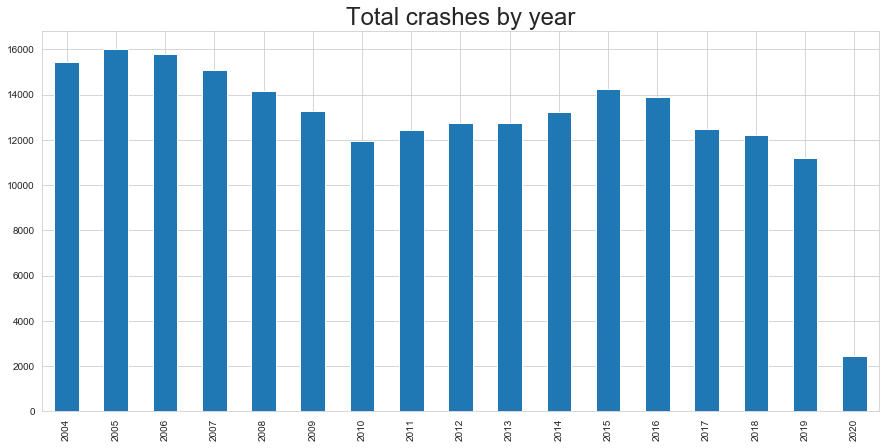

In [6]:
barplot_dates(df, 'Total crashes by year')

# YTD across years

Up to May 4 across all years

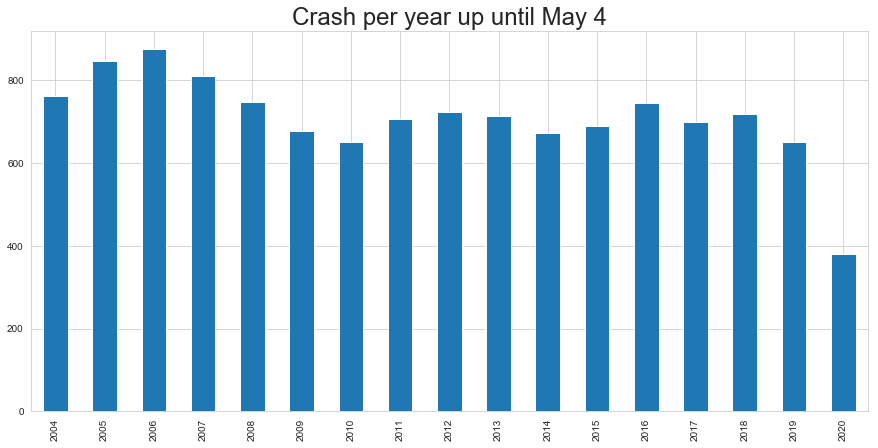

In [7]:
until_may_4 = df['INCDATE'].apply(lambda dt: dt.month <= 5 and dt.day <= 4)
barplot_dates(df[until_may_4], 'Crash per year up until May 4')

# Florentia and Warren crashes

With Florentia and Warren in the intersection text

In [8]:
def find_intersection(s):
    if pd.isnull(s):
        return False

    i = s.lower()
    if 'florentia' in i and 'warren' in i:
        return True
    return False

crashes = df['LOCATION'].apply(find_intersection)

crashes.sum()

59

In [9]:
df[crashes]['INCDATE'].describe().reset_index()

,index,INCDATE
0,count,59
1,unique,58
2,top,2004-11-25 00:00:00+00:00
3,freq,2
4,first,2004-01-28 00:00:00+00:00
5,last,2020-04-20 00:00:00+00:00


In [10]:
df[crashes].groupby(['SEVERITYCODE', 'SEVERITYDESC'])['REPORTNO'].count().reset_index().sort_values('REPORTNO', ascending=False)

,SEVERITYCODE,SEVERITYDESC,REPORTNO
1,1,Property Damage Only Collision,31
2,2,Injury Collision,20
0,0,Unknown,8


## Since 2019

In [11]:
f_and_w_since_2019 = crashes & (df['INCDATE'] >= '2019-01-01')
f_and_w_since_2019.sum()

11

In [12]:
t = df[f_and_w_since_2019].copy()
t['DAY_OF_WEEK'] = t['INCDATE'].apply(lambda dt: f'{dt:%A}')

cols = ['REPORTNO', 'INCDATE', 'DAY_OF_WEEK', 'LOCATION', 'SEVERITYCODE', 'SEVERITYDESC', 'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES', 'ST_COLDESC']
t[cols]

,REPORTNO,INCDATE,DAY_OF_WEEK,LOCATION,SEVERITYCODE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,ST_COLDESC
133,EA30283,2020-04-20 00:00:00+00:00,Monday,FLORENTIA ST AND WARREN AVE N,2,Injury Collision,Angles,4,0,0,4,1,Entering at angle
748,3856334,2020-03-05 00:00:00+00:00,Thursday,WARREN AVE N BETWEEN FULTON ST AND FLORENTIA ST,1,Property Damage Only Collision,Head On,3,0,0,3,0,From opposite direction - all others
1520,EA15327,2020-02-03 00:00:00+00:00,Monday,FLORENTIA ST AND WARREN AVE N,2,Injury Collision,NaN,2,0,0,0,1,NaN
3957,3793483,2019-11-09 00:00:00+00:00,Saturday,FLORENTIA ST AND WARREN AVE N,2,Injury Collision,Angles,3,0,0,2,1,Entering at angle
3994,E979938,2019-11-07 00:00:00+00:00,Thursday,WARREN AVE N BETWEEN FLORENTIA ST AND ETRURIA ST,2,Injury Collision,Sideswipe,2,0,0,2,1,From same direction - both going straight - both moving - sideswipe
6053,E957082,2019-09-05 00:00:00+00:00,Thursday,WARREN AVE N BETWEEN FULTON ST AND FLORENTIA ST,1,Property Damage Only Collision,Parked Car,2,0,0,2,0,One parked--one moving
6665,E968698,2019-08-16 00:00:00+00:00,Friday,FLORENTIA ST AND WARREN AVE N,2,Injury Collision,Angles,2,0,0,2,1,Entering at angle
7220,E945134,2019-07-28 00:00:00+00:00,Sunday,FLORENTIA ST AND WARREN AVE N,2,Injury Collision,Angles,3,0,0,2,2,Entering at angle
8763,3805901,2019-06-11 00:00:00+00:00,Tuesday,FLORENTIA ST AND WARREN AVE N,2,Injury Collision,Angles,2,0,0,2,1,Entering at angle
9151,3750948,2019-05-31 00:00:00+00:00,Friday,FLORENTIA ST AND WARREN AVE N,2,Injury Collision,Angles,4,0,0,3,1,Entering at angle


---------

# Individual collisions

## April 20, 2020 collision

In [13]:
df[df['REPORTNO'] == 'EA30283'].reset_index().T

,0
index,133
X,1.26548e+06
Y,239671
OBJECTID,218129
INCKEY,330910
COLDETKEY,332410
REPORTNO,EA30283
STATUS,Matched
ADDRTYPE,Intersection
INTKEY,28049


# May 8 collision

Not reported yet